# 2. Visualization

## 2.2. Open access prevalence

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # version 3.5.2
import pickle
import operator
from itertools import groupby
import openalex

In [6]:
articles = pd.read_pickle("./data/keyword_filtered_articles_EU27_with_taxonomy_concept_in_journal.pkl")
articles = openalex.flatten_works(articles)
articles

,id,doi,title,display_name,publication_year,publication_date,ids,language,primary_location,type,...,is_in_doaj,source_host_organization,source_host_organization_name,source_host_organization_lineage,source_host_organization_lineage_names,source_type,is_oa,oa_status,oa_url,any_repository_has_fulltext
0,https://openalex.org/W2282635459,https://doi.org/10.1071/is15033,Integrative systematic studies on tardigrades ...,Integrative systematic studies on tardigrades ...,2016,2016-08-31,{'openalex': 'https://openalex.org/W2282635459...,en,"{'is_oa': False, 'landing_page_url': 'https://...",journal-article,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,True,green,https://iris.unimore.it/bitstream/11380/110720...,True
1,https://openalex.org/W1534942643,https://doi.org/10.1071/is13002,Morphological and molecular insights on Megalo...,Morphological and molecular insights on Megalo...,2013,2013-01-01,{'openalex': 'https://openalex.org/W1534942643...,en,"{'is_oa': False, 'landing_page_url': 'https://...",journal-article,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,False,closed,None,False
2,https://openalex.org/W2159262135,https://doi.org/10.1071/is13030,Two distinct evolutionary lineages of the Asta...,Two distinct evolutionary lineages of the Asta...,2014,2014-01-01,{'openalex': 'https://openalex.org/W2159262135...,en,"{'is_oa': False, 'landing_page_url': 'https://...",journal-article,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,False,closed,None,False
3,https://openalex.org/W2271608622,https://doi.org/10.1071/is15023,Molecular evidence for non-monophyly of the pi...,Molecular evidence for non-monophyly of the pi...,2016,2016-01-01,{'openalex': 'https://openalex.org/W2271608622...,en,"{'is_oa': False, 'landing_page_url': 'https://...",journal-article,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,False,closed,None,False
4,https://openalex.org/W2209115793,https://doi.org/10.1071/is14019,Mitochondrial DNA analyses reveal widespread t...,Mitochondrial DNA analyses reveal widespread t...,2015,2015-01-01,{'openalex': 'https://openalex.org/W2209115793...,en,"{'is_oa': False, 'landing_page_url': 'https://...",journal-article,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,True,green,https://oa.upm.es/40973/1/INVE_MEM_2015_224830...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11649,https://openalex.org/W4253285772,https://doi.org/10.21684/0132-8077-2019-27-2-1...,"MERISTACARUS BOCHKOVI (ACARI, ORIBATIDA, LOHMA...","MERISTACARUS BOCHKOVI (ACARI, ORIBATIDA, LOHMA...",2019,2019-12-30,{'openalex': 'https://openalex.org/W4253285772...,en,"{'is_oa': False, 'landing_page_url': 'https://...",journal-article,...,unknown,https://openalex.org/P4310312765,University of Tyumen,[https://openalex.org/P4310312765],[University of Tyumen],journal,False,closed,None,False
11650,https://openalex.org/W4253410054,https://doi.org/10.21684/0132-8077-2021-29-1-3-9,TAXONOMIC CONTRIBUTION TO THE KNOWLEDGE OF THE...,TAXONOMIC CONTRIBUTION TO THE KNOWLEDGE OF THE...,2021,2021-01-01,{'openalex': 'https://openalex.org/W4253410054...,en,"{'is_oa': False, 'landing_page_url': 'https://...",journal-article,...,unknown,https://openalex.org/P4310312765,University of Tyumen,[https://openalex.org/P4310312765],[University of Tyumen],journal,False,closed,None,False
11651,https://openalex.org/W4254963337,https://doi.org/10.21684/0132-8077-2019-27-2-2...,A NEW SYRINGOPHILID MITE (ACARIFORMES: SYRINGO...,A NEW SYRINGOPHILID MITE (ACARIFORMES: SYRINGO...,2019,2019-12-30,{'openalex': 'https://openalex.org/W4254963337...,en,"{'is_oa': True, 'landing_page_url': 'http

In [10]:
set(articles.oa_status)

{'bronze', 'closed', 'gold', 'green', 'hybrid'}

In [20]:
# get oa statuses of articles PER JOURNAL
journal_names = sorted(list(set(articles["source_display_name"])))
data_plot = pd.DataFrame()

for j in journal_names:
    journal_df = articles[articles["source_display_name"]==j]
    oa_statuses = list(journal_df["oa_status"].fillna("unknown"))
    oa_statuses = sorted(oa_statuses)
    
    df = articles[articles["source_display_name"]==j]
    freqs = [len(list(group)) for key, group in groupby(oa_statuses)]
    
    # link counts to oa statuses
    freqs_dict = {}
    for i, status in enumerate(sorted(set(oa_statuses))):
        freqs_dict[status] = freqs[i]
    
    data_plot = pd.concat([data_plot, pd.DataFrame(freqs_dict, index=[j])]).fillna(0)
    
data_plot

,bronze,closed,gold,green,hybrid
Acarina,10.0,4.0,0.0,0.0,0.0
Acarologia,0.0,1.0,96.0,6.0,0.0
Acta Entomologica Musei Nationalis Pragae,13.0,80.0,0.0,79.0,0.0
Adansonia,0.0,0.0,51.0,0.0,0.0
African Invertebrates,0.0,2.0,17.0,0.0,0.0
...,...,...,...,...,...
Zoosystema,0.0,0.0,0.0,97.0,0.0
Zoosystematica Rossica,0.0,23.0,0.0,0.0,0.0
Zoosystematics and Evolution,0.0,6.0,1.0,0.0,0.0
Zootaxa,252.0,4016.0,0.0,179.0,0.0


In [28]:
# removing journals with fewer than 20 relevant articles to simplify graph 
data_plot["sum"] = data_plot.sum(axis=1)
data_plot = data_plot[data_plot["sum"]>=20]
data_plot = data_plot.iloc[:,0:5]
data_plot

,bronze,closed,gold,green,hybrid
Acarologia,0.0,1.0,96.0,6.0,0.0
Acta Entomologica Musei Nationalis Pragae,13.0,80.0,0.0,79.0,0.0
Adansonia,0.0,0.0,51.0,0.0,0.0
Annales Botanici Fennici,0.0,91.0,0.0,24.0,0.0
Annales De La Societe Entomologique De France,0.0,63.0,0.0,3.0,0.0
Annales Zoologici,3.0,218.0,0.0,2.0,0.0
Aquatic Insects,0.0,27.0,0.0,2.0,0.0
Australian Systematic Botany,2.0,19.0,0.0,3.0,4.0
Bionomina,5.0,34.0,0.0,1.0,0.0
Contributions to zoology,0.0,0.0,38.0,0.0,0.0


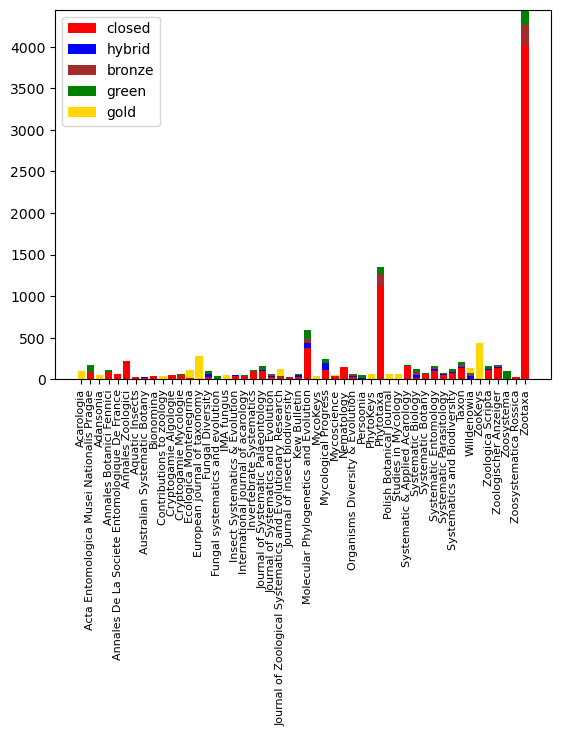

<Figure size 640x480 with 0 Axes>

In [29]:
labels = list(data_plot.index)
fig, ax = plt.subplots()

#ax.bar(labels, data_plot["unknown"], NO UNKNOWNS IN NEWER DATA
#       label="unknown", color="grey")
ax.bar(labels, data_plot["closed"],
       label="closed", color="red")
ax.bar(labels, data_plot["hybrid"], bottom=data_plot["closed"],
       label="hybrid", color="blue")
ax.bar(labels, data_plot["bronze"], bottom=data_plot["closed"]+data_plot["hybrid"],
       label="bronze", color="brown")
ax.bar(labels, data_plot["green"], 
       bottom=data_plot["closed"]+data_plot["hybrid"]+data_plot["bronze"],
       label="green", color="green")
ax.bar(labels, data_plot["gold"], 
       bottom=data_plot["closed"]+data_plot["hybrid"]+data_plot["bronze"]+data_plot["green"],
       label="gold", color="gold")
ax.legend()

plt.xticks(rotation=90, ha="center", fontsize=8)
plt.show()

plt.savefig("./figures/absolute_oa_status_journals.png")

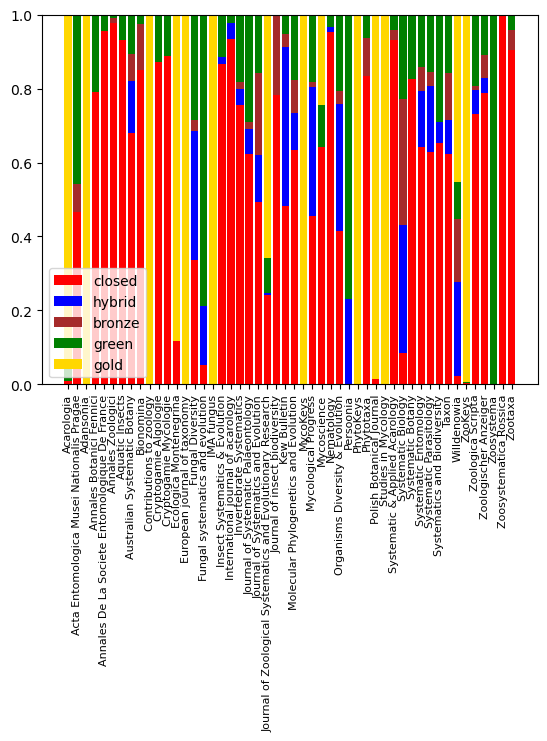

<Figure size 640x480 with 0 Axes>

In [32]:
percentages_oa = pd.DataFrame()

for _, journal in data_plot.iterrows():
    percentages_oa = pd.concat([percentages_oa, journal / sum(journal)], axis=1)

percentages_oa = percentages_oa.transpose()

fig, ax = plt.subplots()

ax.bar(labels, percentages_oa["closed"],
       label="closed", color="red")
ax.bar(labels, percentages_oa["hybrid"], 
       bottom=percentages_oa["closed"],
       label="hybrid", color="blue")
ax.bar(labels, percentages_oa["bronze"], 
       bottom=percentages_oa["closed"]+percentages_oa["hybrid"],
       label="bronze", color="brown")
ax.bar(labels, percentages_oa["green"], 
       bottom=percentages_oa["closed"]+percentages_oa["hybrid"]+percentages_oa["bronze"],
       label="green", color="green")
ax.bar(labels, percentages_oa["gold"], 
       bottom=percentages_oa["closed"]+percentages_oa["hybrid"]+percentages_oa["bronze"]+percentages_oa["green"],
       label="gold", color="gold")
ax.legend()

plt.xticks(rotation=90, ha="center", fontsize=8)
plt.show()

plt.savefig("./figures/relative_oa_status_journals.png")